In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
appl_df = pd.read_csv('/content/gdrive/My Drive/DB Home Credit Risk/application_train.csv')

In [0]:
appl_df.shape

(307511, 122)

In [0]:
appl_nulls = appl_df.isnull().sum().to_frame().reset_index()

In [0]:
pd.set_option('display.max_rows', 500)

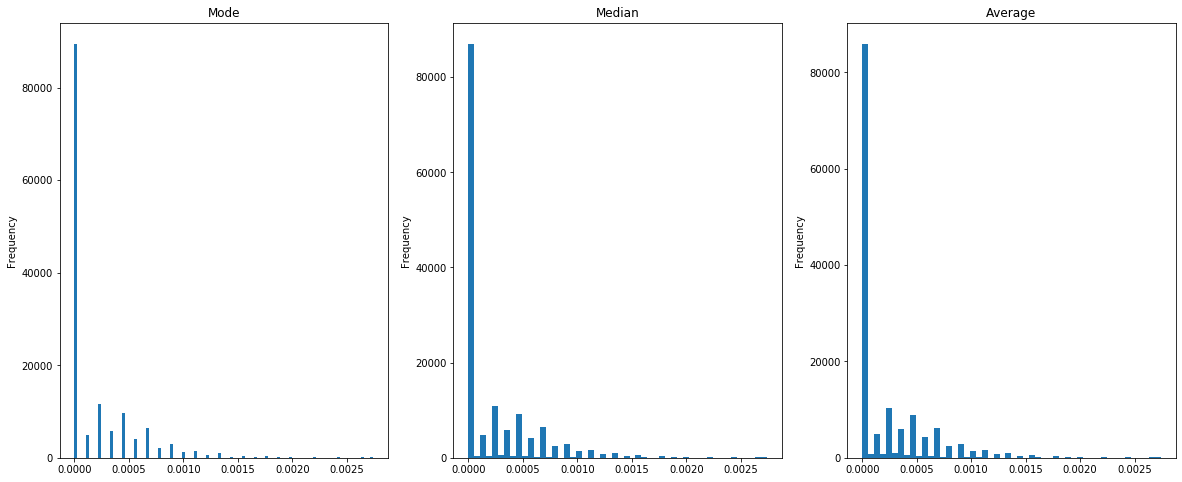

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axarr = plt.subplots(1, 3, figsize=(20, 8))


(appl_df['ELEVATORS_MODE'] / 365).plot.hist(ax=axarr[0], bins = 100, title='Mode')
(appl_df['ELEVATORS_MEDI'] / 365).plot.hist(ax=axarr[1], bins = 50, title='Median')
(appl_df['ELEVATORS_AVG'] / 365).plot.hist(ax=axarr[2], bins = 50, title='Average')


In [0]:

a = appl_df.groupby(['HOUSETYPE_MODE']) 
a.first()

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
HOUSETYPE_MODE                ...                            
block of flats        100002  ...                         1.0
specific housing      100402  ...                         1.0
terraced house        100240  ...                         4.0

[3 rows x 121 columns]

In [0]:
appl_df[appl_df['FLAG_OWN_REALTY']=='Y']['APARTMENTS_MODE'].count()

106628

In [0]:
appl_df[appl_df['FLAG_OWN_REALTY']=='N']['APARTMENTS_MODE'].count()

44822

In [0]:
appl_df[appl_df['FLAG_OWN_REALTY']=='Y']['FLAG_OWN_REALTY'].count()

213312

In [0]:
appl_df[appl_df['FLAG_OWN_REALTY']=='N']['FLAG_OWN_REALTY'].count()

94199

In [0]:
appl_df.isnull().sum().sort_values(ascending = False)
#/307511


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [0]:
appl_nulls

index       0
0                      SK_ID_CURR       0
1                          TARGET       0
2              NAME_CONTRACT_TYPE       0
3                     CODE_GENDER       0
4                    FLAG_OWN_CAR       0
5                 FLAG_OWN_REALTY       0
6                    CNT_CHILDREN       0
7                AMT_INCOME_TOTAL       0
8                      AMT_CREDIT       0
9                     AMT_ANNUITY      12
10                AMT_GOODS_PRICE     278
11                NAME_TYPE_SUITE    1292
12               NAME_INCOME_TYPE       0
13            NAME_EDUCATION_TYPE       0
14             NAME_FAMILY_STATUS       0
15              NAME_HOUSING_TYPE       0
16     REGION_POPULATION_RELATIVE       0
17                     DAYS_BIRTH       0
18                  DAYS_EMPLOYED       0
19              DAYS_REGISTRATION       0
20                DAYS_ID_PUBLISH       0
21                    OWN_CAR_AGE  202929
22                     FLAG_MOBIL       0
23                 FLAG_EMP_PHONE       0
24                FLAG_WORK_PHONE       0
25               FLAG_CONT_MOBILE       0
26                     FLAG_PHONE       0
27                     FLAG_EMAIL       0
28                OCCUPATION_TYPE   96391
29                CNT_FAM_MEMBERS       2
30           REGION_RATING_CLIENT       0
31    REGION_RATING_CLIENT_W_CITY       0
32     WEEKDAY_APPR_PROCESS_START       0
33        HOUR_APPR_PROCESS_START       0
34     REG_REGION_NOT_LIVE_REGION       0
35     REG_REGION_NOT_WORK_REGION       0
36    LIVE_REGION_NOT_WORK_REGION       0
37         REG_CITY_NOT_LIVE_CITY       0
38         REG_CITY_NOT_WORK_CITY       0
39        LIVE_CITY_NOT_WORK_CITY       0
40              ORGANIZATION_TYPE       0
41                   EXT_SOURCE_1  173378
42                   EXT_SOURCE_2     660
43                   EXT_SOURCE_3   60965
44                 APARTMENTS_AVG  156061
45               BASEMENTAREA_AVG  179943
46    YEARS_BEGINEXPLUATATION_AVG  150007
47                YEARS_BUILD_AVG  204488
48                 COMMONAREA_AVG  214865
49                  ELEVATORS_AVG  163891
50                  ENTRANCES_AVG  154828
51                  FLOORSMAX_AVG  153020
52                  FLOORSMIN_AVG  208642
53                   LANDAREA_AVG  182590
54           LIVINGAPARTMENTS_AVG  210199
55                 LIVINGAREA_AVG  154350
56        NONLIVINGAPARTMENTS_AVG  213514
57              NONLIVINGAREA_AVG  169682
58                APARTMENTS_MODE  156061
59              BASEMENTAREA_MODE  179943
60   YEARS_BEGINEXPLUATATION_MODE  150007
61               YEARS_BUILD_MODE  204488
62                COMMONAREA_MODE  214865
63                 ELEVATORS_MODE  163891
64                 ENTRANCES_MODE  154828
65                 FLOORSMAX_MODE  153020
66                 FLOORSMIN_MODE  208642
67                  LANDAREA_MODE  182590
68          LIVINGAPARTMENTS_MODE  210199
69                LIVINGAREA_MODE  154350
70       NONLIVINGAPARTMENTS_MODE  213514
71             NONLIVINGAREA_MODE  169682
72                APARTMENTS_MEDI  156061
73              BASEMENTAREA_MEDI  179943
74   YEARS_BEGINEXPLUATATION_MEDI  150007
75               YEARS_BUILD_MEDI  204488
76                COMMONAREA_MEDI  214865
77                 ELEVATORS_MEDI  163891
78                 ENTRANCES_MEDI  154828
79                 FLOORSMAX_MEDI  153020
80                 FLOORSMIN_MEDI  208642
81                  LANDAREA_MEDI  182590
82          LIVINGAPARTMENTS_MEDI  210199
83                LIVINGAREA_MEDI  154350
84       NONLIVINGAPARTMENTS_MEDI  213514
85             NONLIVINGAREA_MEDI  169682
86             FONDKAPREMONT_MODE  210295
87                 HOUSETYPE_MODE  154297
88                 TOTALAREA_MODE  148431
89             WALLSMATERIAL_MODE  156341
90            EMERGENCYSTATE_MODE  145755
91       OBS_30_CNT_SOCIAL_CIRCLE    1021
92       DEF_30_CNT_SOCIAL_CIRCLE    1021
93       OBS_60_CNT_SOCIAL_CIRCLE    1021
94       DEF_60_CNT_SOCIAL_CIRCLE    1

In [0]:
desc = pd.read_csv('/content/gdrive/My Drive/DB Home Credit Risk/HomeCredit_columns_description.csv', encoding = 'unicode_escape')

In [0]:
desc

Unnamed: 0  ...                                Special
0             1  ...                                    NaN
1             2  ...                                    NaN
2             5  ...                                    NaN
3             6  ...                                    NaN
4             7  ...                                    NaN
5             8  ...                                    NaN
6             9  ...                                    NaN
7            10  ...                                    NaN
8            11  ...                                    NaN
9            12  ...                                    NaN
10           13  ...                                    NaN
11           14  ...                                    NaN
12           15  ...                                    NaN
13           16  ...                                    NaN
14           17  ...                                    NaN
15           18  ...                                    NaN
16           19  ...                            normalized 
17           20  ...  time only relative to the application
18           21  ...  time only relative to the application
19           22  ...  time only relative to the application
20           23  ...  time only relative to the application
21           24  ...                                    NaN
22           25  ...                                    NaN
23           26  ...                                    NaN
24           27  ...                                    NaN
25           28  ...                                    NaN
26           29  ...                                    NaN
27           30  ...                                    NaN
28           31  ...                                    NaN
29           32  ...                                    NaN
30           33  ...                                    NaN
31           34  ...                                    NaN
32           35  ...                                    NaN
33           36  ...                                rounded
34           37  ...                                    NaN
35           38  ...                                    NaN
36           39  ...                                    NaN
37           40  ...                                    NaN
38           41  ...                                    NaN
39           42  ...                                    NaN
40           43  ...                                    NaN
41           44  ...                             normalized
42           45  ...                             normalized
43           46  ...                             normalized
44           47  ...                             normalized
45           48  ...                             normalized
46           49  ...                             normalized
47           50  ...                             normalized
48           51  ...                             normalized
49           52  ...                             normalized
50           53  ...                             normalized
51           54  ...                             normalized
52           55  ...                             normalized
53           56  ...                             normalized
54           57  ...                             normalized
55           58  ...                             normalized
56           59  ...                             normalized
57           60  ...                             normalized
58           61  ...                             normalized
59           62  ...                             normalized
60           63  ...                             normalized
61           64  ...                             normalized
62           65  ...                             normalized
63           66  ...                             normalized
64           67  ...                             normalized
65           68  ...                         

In [0]:
appl_df.SK_ID_CURR.nunique()

307511

In [0]:
import pandas as pd
bureau = pd.read_csv('/content/gdrive/My Drive/DB Home Credit Risk/bureau.csv')

In [0]:
bureau[bureau['SK_ID_CURR'].isin(appl_df['SK_ID_CURR'])]['SK_ID_CURR'].nunique()

263491

In [0]:
import pandas as pd
prev_appl = pd.read_csv('/content/gdrive/My Drive/DB Home Credit Risk/previous_application.csv')

In [0]:
prev_appl[prev_appl['SK_ID_CURR'].isin(appl_df['SK_ID_CURR'])]['SK_ID_CURR'].nunique()

291057

In [0]:
corr = appl_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [0]:
target = appl_df.groupby(['TARGET'])['SK_ID_CURR'].count()


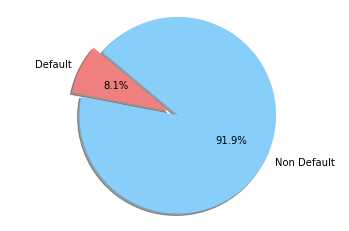

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Default', 'Non Default'
sizes = [target[1], target[0]]
colors = [ 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<BarContainer object of 30 artists>

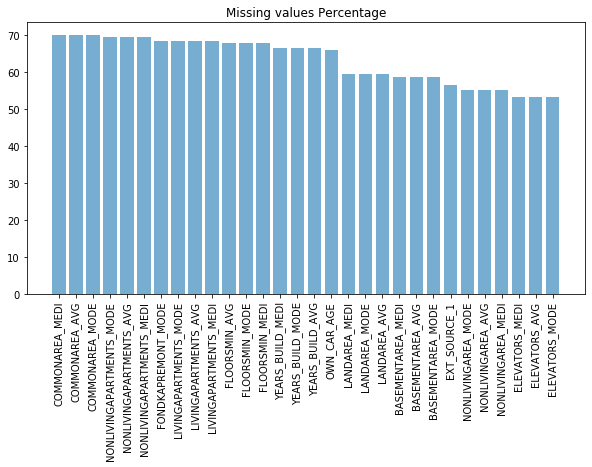

In [0]:
#missing value calculation
mis_val = appl_df.isnull().sum()
mis_val_perc = 100*appl_df.isnull().sum()/len(appl_df)
mis_val_df1 = pd.concat([mis_val,mis_val_perc], axis=1)
mis_val_df = mis_val_df1.rename(columns = { 0 : 'Missing Values', 1:'Missing Values Perc'}).sort_values(['Missing Values'], axis=0, ascending = False)
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Missing values Percentage', loc='center')
plt.bar(x = mis_val_df[0:30].index.values, height=mis_val_df[0:30]['Missing Values Perc'], alpha = 0.6)

Text(0.5, 1.0, 'Distribution')

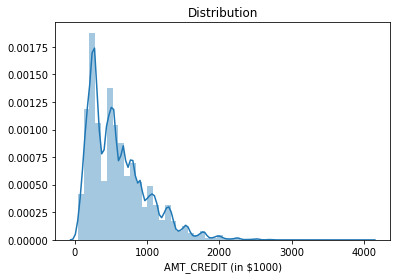

In [0]:
import seaborn as sns
sns.distplot(appl_df[['AMT_CREDIT']]/1000, axlabel='AMT_CREDIT (in $1000)')
plt.title("Distribution")

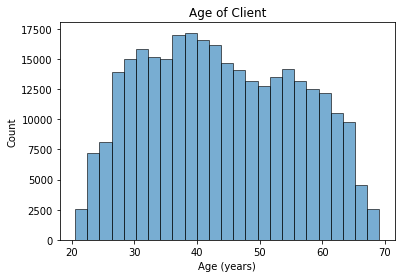

In [0]:
appl_df['DAYS_BIRTH'] = abs(appl_df['DAYS_BIRTH'])
plt.hist(appl_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25, alpha=0.6)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

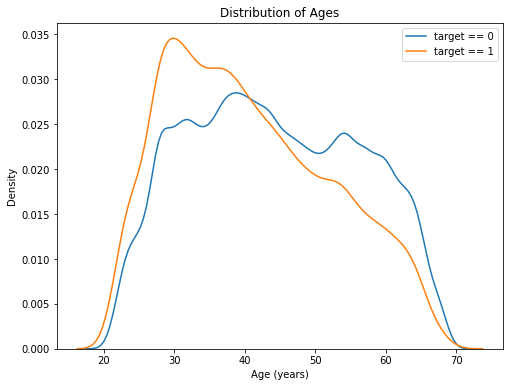

In [0]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(appl_df.loc[appl_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(appl_df.loc[appl_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income

ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income

CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due

DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [0]:
appl_df['CREDIT_INCOME_PERCENT'] = appl_df['AMT_CREDIT'] / appl_df['AMT_INCOME_TOTAL']
appl_df['ANNUITY_INCOME_PERCENT'] = appl_df['AMT_ANNUITY'] / appl_df['AMT_INCOME_TOTAL']
appl_df['CREDIT_TERM'] = appl_df['AMT_ANNUITY'] / appl_df['AMT_CREDIT']
appl_df['DAYS_EMPLOYED_PERCENT'] = appl_df['DAYS_EMPLOYED'] / appl_df['DAYS_BIRTH']

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


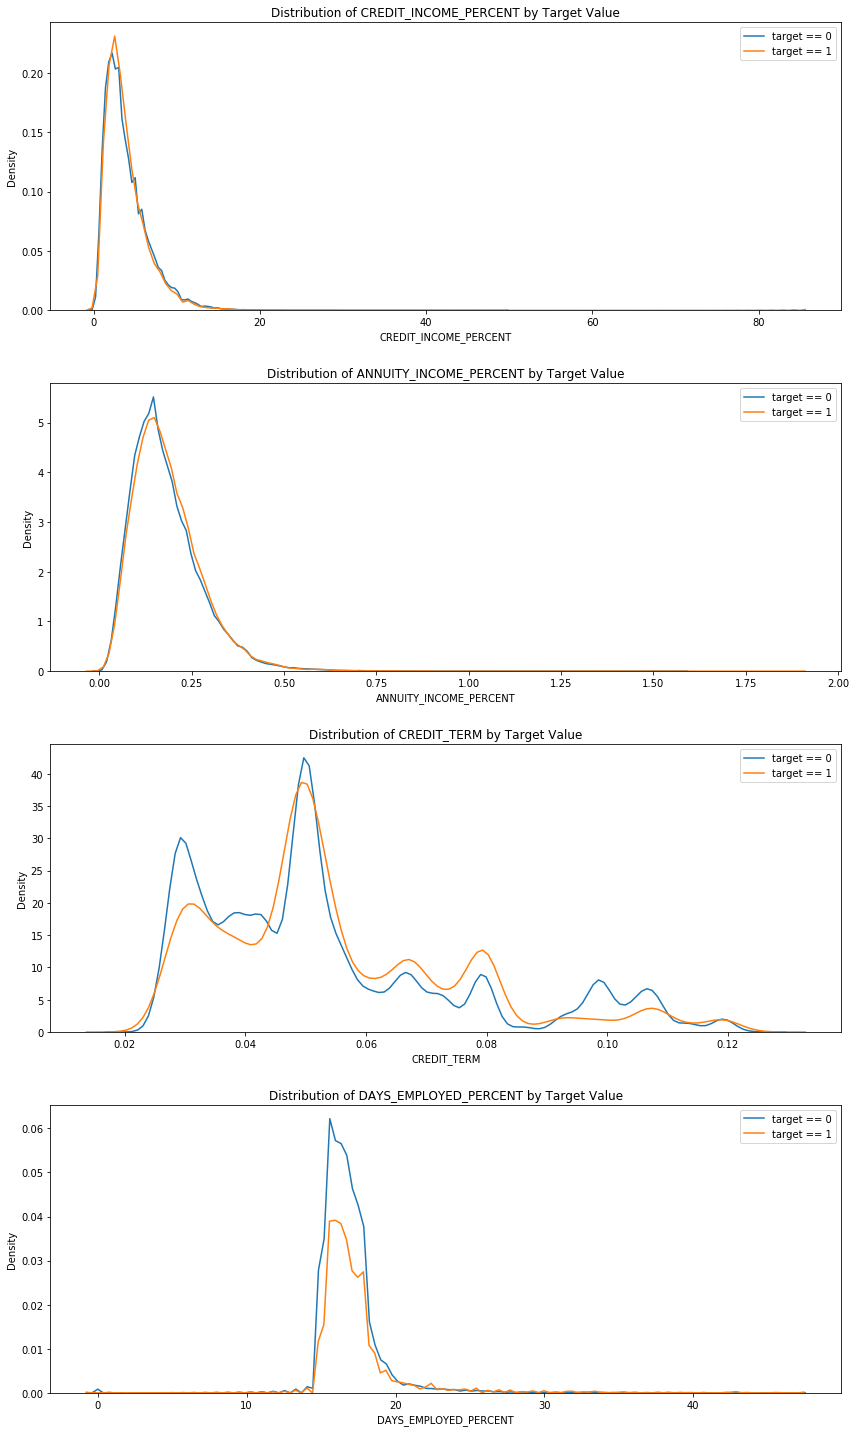

In [0]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(appl_df.loc[appl_df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(appl_df.loc[appl_df['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [0]:
appl_df.describe()


SK_ID_CURR         TARGET  ...    CREDIT_TERM  DAYS_EMPLOYED_PERCENT
count  307511.000000  307511.000000  ...  307499.000000          307511.000000
mean   278180.518577       0.080729  ...       0.053695               2.920135
std    102790.175348       0.272419  ...       0.022481               6.627098
min    100002.000000       0.000000  ...       0.022073              -0.728811
25%    189145.500000       0.000000  ...       0.036900              -0.191000
50%    278202.000000       0.000000  ...       0.050000              -0.088645
75%    367142.500000       0.000000  ...       0.064043              -0.021559
max    456255.000000       1.000000  ...       0.124430              47.489663

[8 rows x 110 columns]

In [0]:
appl_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## Creating a new dataframe and imputing missing values

In [0]:
clean_appl_df = appl_df
clean_appl_df.head()

SK_ID_CURR  TARGET  ... CREDIT_TERM DAYS_EMPLOYED_PERCENT
0      100002       1  ...    0.060749             -0.067329
1      100003       0  ...    0.027598             -0.070862
2      100004       0  ...    0.050000             -0.011814
3      100006       0  ...    0.094941             -0.159905
4      100007       0  ...    0.042623             -0.152418

[5 rows x 126 columns]

### Imputing NaNs of columns based on Household_type column





In [0]:
clean_appl_df['COMMONAREA_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['COMMONAREA_MEDI'].fillna(-0.1),clean_appl_df['COMMONAREA_MEDI'].fillna(0.0))

In [0]:
clean_appl_df['APARTMENTS_MEDI'].fillna(0.0,inplace = True)

In [0]:
clean_appl_df['NONLIVINGAPARTMENTS_MEDI'].fillna(0.0,inplace = True)

In [0]:
clean_appl_df['LIVINGAPARTMENTS_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['LIVINGAPARTMENTS_MEDI'].fillna(-0.1),clean_appl_df['LIVINGAPARTMENTS_MEDI'].fillna(0.0))

In [0]:
clean_appl_df['FLOORSMIN_MEDI'].fillna(clean_appl_df['FLOORSMIN_MEDI'].median(),inplace =  True)

In [0]:
clean_appl_df['YEARS_BUILD_MEDI'].fillna(1.1,inplace = True)

In [0]:
clean_appl_df['ENTRANCES_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['ENTRANCES_MEDI'].fillna(-0.1),clean_appl_df['ENTRANCES_MEDI'].fillna(0.0))

In [0]:
clean_appl_df['BASEMENTAREA_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['BASEMENTAREA_MEDI'].fillna(-0.1),clean_appl_df['BASEMENTAREA_MEDI'].fillna(0.0))

In [0]:
clean_appl_df['NONLIVINGAREA_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['NONLIVINGAREA_MEDI'].fillna(-0.1),clean_appl_df['NONLIVINGAREA_MEDI'].fillna(0.0))

In [0]:
clean_appl_df['LIVINGAREA_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['LIVINGAREA_MEDI'].fillna(-0.1),clean_appl_df['LIVINGAREA_MEDI'].fillna(0.0))

In [0]:
clean_appl_df['FLOORSMAX_MEDI'].fillna(clean_appl_df['FLOORSMAX_MEDI'].median(),inplace =  True)

In [0]:
clean_appl_df['TOTALAREA_MODE'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['TOTALAREA_MODE'].fillna(-0.1),clean_appl_df['TOTALAREA_MODE'].fillna(0.0))

In [0]:
clean_appl_df['ELEVATORS_MEDI'] = np.where(clean_appl_df['HOUSETYPE_MODE'].isnull(),clean_appl_df['ELEVATORS_MEDI'].fillna(-0.1),clean_appl_df['ELEVATORS_MEDI'].fillna(0.0))

### Dropping mode and average columns


In [0]:
clean_appl_df = clean_appl_df.drop(['COMMONAREA_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['COMMONAREA_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['APARTMENTS_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['APARTMENTS_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['NONLIVINGAPARTMENTS_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['NONLIVINGAPARTMENTS_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['LIVINGAPARTMENTS_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['LIVINGAPARTMENTS_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['FLOORSMIN_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['FLOORSMIN_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['YEARS_BUILD_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['YEARS_BUILD_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['ENTRANCES_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['ENTRANCES_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['BASEMENTAREA_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['BASEMENTAREA_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['NONLIVINGAREA_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['NONLIVINGAREA_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['LIVINGAREA_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['LIVINGAREA_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['FLOORSMAX_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['FLOORSMAX_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['ELEVATORS_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['ELEVATORS_MODE'],axis=1)

### Imputing NaNs of columns based on Flag_Own_Reality column

In [0]:
clean_appl_df['LANDAREA_MEDI'] = np.where(clean_appl_df['FLAG_OWN_REALTY'].isnull(),clean_appl_df['LANDAREA_MEDI'].fillna(-0.1),clean_appl_df['LANDAREA_MEDI'].fillna(0.0))

### Dropping avg and mode columns

In [0]:
clean_appl_df = clean_appl_df.drop(['LANDAREA_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['LANDAREA_MODE'],axis=1)

### Imputing NaNs of columns based on Flag_Own_Car column

In [0]:
clean_appl_df['OWN_CAR_AGE'] = np.where((clean_appl_df['FLAG_OWN_CAR']== 'Y'),clean_appl_df['OWN_CAR_AGE'].fillna(91.0),clean_appl_df['OWN_CAR_AGE'].fillna(92.0))

### Imputing NaNs of columns based on no condition



In [0]:
clean_appl_df['CNT_FAM_MEMBERS'].fillna(0.0,inplace = True)
clean_appl_df['AMT_GOODS_PRICE'].fillna(clean_appl_df['AMT_GOODS_PRICE'].median(),inplace =  True)
clean_appl_df['AMT_ANNUITY'].fillna(clean_appl_df['AMT_ANNUITY'].median(),inplace =  True)
clean_appl_df['DAYS_LAST_PHONE_CHANGE'].fillna(0.0,inplace = True)
clean_appl_df['YEARS_BEGINEXPLUATATION_MEDI'].fillna(1.1,inplace = True)
clean_appl_df['EXT_SOURCE_1'].fillna(-0.1,inplace = True)
clean_appl_df['EXT_SOURCE_2'].fillna(-0.1,inplace = True)
clean_appl_df['EXT_SOURCE_3'].fillna(-0.1,inplace = True)
clean_appl_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace = True)
clean_appl_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace = True)
clean_appl_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace = True)
clean_appl_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace = True)
clean_appl_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace = True)
clean_appl_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace = True)
clean_appl_df['ANNUITY_INCOME_PERCENT'].fillna(0,inplace = True)
clean_appl_df['CREDIT_TERM'].fillna(0,inplace = True)

### Dropping mode and average columns


In [0]:
clean_appl_df = clean_appl_df.drop(['YEARS_BEGINEXPLUATATION_AVG'],axis=1)
clean_appl_df = clean_appl_df.drop(['YEARS_BEGINEXPLUATATION_MODE'],axis=1)

### Dropping Columns which are not needed





In [0]:
clean_appl_df = clean_appl_df.drop(['EMERGENCYSTATE_MODE'],axis=1)
clean_appl_df = clean_appl_df.drop(['FONDKAPREMONT_MODE'],axis=1)

### Creating a new flag column which states whether the customer has a house and whether he owns or rents it

In [0]:
clean_appl_df['NEW_FLAG'] = np.where((clean_appl_df['FLAG_OWN_REALTY'] == 'Y') & (clean_appl_df['HOUSETYPE_MODE'].isnull()),'Rent',(np.where((clean_appl_df['FLAG_OWN_REALTY'] == 'Y') & (clean_appl_df['HOUSETYPE_MODE'].notnull()),'Own','No House')))

In [0]:
clean_appl_df['NEW_FLAG'].value_counts()

Own         107781
Rent        105531
No House     94199
Name: NEW_FLAG, dtype: int64

### Dummy Encoding Columns (Household_Type, Occupation_Type, Walls_Material, Name_Type_Suite)

In [0]:
clean_appl_df = pd.get_dummies(data = clean_appl_df, columns= ['HOUSETYPE_MODE','OCCUPATION_TYPE','WALLSMATERIAL_MODE','NAME_TYPE_SUITE'])

### Converting FLAG_OWN_REALTY and FLAG_OWN_CAR to a binary flag with 1/0

In [0]:
clean_appl_df['FLAG_OWN_REALTY'] = np.where((clean_appl_df['FLAG_OWN_REALTY']== 'Y'),1,0)
clean_appl_df['FLAG_OWN_REALTY'].value_counts()

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [0]:
clean_appl_df['FLAG_OWN_CAR'] = np.where((clean_appl_df['FLAG_OWN_CAR']== 'Y'),1,0)
clean_appl_df['FLAG_OWN_CAR'].value_counts()

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

### Creating a new column for count of social circle by taking a ratio of DEF and OBS and replacing null values by 0

In [0]:
clean_appl_df['CNT_SOCIAL_CIRCLE_30'] = clean_appl_df['DEF_30_CNT_SOCIAL_CIRCLE']/clean_appl_df['OBS_30_CNT_SOCIAL_CIRCLE']
clean_appl_df['CNT_SOCIAL_CIRCLE_60'] = clean_appl_df['DEF_60_CNT_SOCIAL_CIRCLE']/clean_appl_df['OBS_60_CNT_SOCIAL_CIRCLE']
clean_appl_df = clean_appl_df.drop(['OBS_30_CNT_SOCIAL_CIRCLE'],axis=1)
clean_appl_df = clean_appl_df.drop(['DEF_30_CNT_SOCIAL_CIRCLE'],axis=1)
clean_appl_df = clean_appl_df.drop(['OBS_60_CNT_SOCIAL_CIRCLE'],axis=1)
clean_appl_df = clean_appl_df.drop(['DEF_60_CNT_SOCIAL_CIRCLE'],axis=1)

In [0]:
clean_appl_df['CNT_SOCIAL_CIRCLE_30'].fillna(0,inplace=True)
clean_appl_df['CNT_SOCIAL_CIRCLE_60'].fillna(0,inplace=True)

In [0]:
clean_appl_df.isnull().sum()

SK_ID_CURR                               0
TARGET                                   0
NAME_CONTRACT_TYPE                       0
CODE_GENDER                              0
FLAG_OWN_CAR                             0
FLAG_OWN_REALTY                          0
CNT_CHILDREN                             0
AMT_INCOME_TOTAL                         0
AMT_CREDIT                               0
AMT_ANNUITY                              0
AMT_GOODS_PRICE                          0
NAME_INCOME_TYPE                         0
NAME_EDUCATION_TYPE                      0
NAME_FAMILY_STATUS                       0
NAME_HOUSING_TYPE                        0
REGION_POPULATION_RELATIVE               0
DAYS_BIRTH                               0
DAYS_EMPLOYED                            0
DAYS_REGISTRATION                        0
DAYS_ID_PUBLISH                          0
OWN_CAR_AGE                              0
FLAG_MOBIL                               0
FLAG_EMP_PHONE                           0
FLAG_WORK_P

In [0]:
clean_appl_df.to_csv('/content/gdrive/My Drive/DB Home Credit Risk/new_application_train.csv')